Welcome to the document where we show how to import your data for use with the program. The functions with documentation and the explanation of what happens can be found in 'Chemscreen_with_functions.

In [15]:
#please not that the initial conditions of reactions need to be tuned so that rate constants don't exceed 1, this overloads the dfferential solver
#needed imports
import chemscreen
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
P = 50
KH= 1282
CH2 = P/KH
timespan = [0, 1, 3, 5, 7, 9, 11, 13, 15, 19, 23, 27, 31, 40, 50, 60, 90, 120, 150, 180, 240, 300, 360, 440, 530, 620, 810, 900, 955, 1246]

In [17]:
# load in and read your data
data_323_1_1 = pd.read_csv('CSVs/sim_kinetics_323_1_1.csv')
data_323_1_1 = data_323_1_1.drop('Unnamed: 0', axis=1)

data_323_4_2 = pd.read_csv('CSVs/sim_kinetics_323_4_2.csv')
data_323_4_2 = data_323_4_2.drop('Unnamed: 0', axis=1)

data_323_8_1p5 = pd.read_csv('CSVs/sim_kinetics_323_8_1.5.csv')
data_323_8_1p5 = data_323_8_1p5.drop('Unnamed: 0', axis=1)

data_363_1_1 = pd.read_csv('CSVs/sim_kinetics_363_1_1.csv')
data_363_1_1 = data_363_1_1.drop('Unnamed: 0', axis=1)

data_363_4_2 = pd.read_csv('CSVs/sim_kinetics_363_4_2.csv')
data_363_4_2 = data_363_4_2.drop('Unnamed: 0', axis=1)

data_363_8_1p5 = pd.read_csv('CSVs/sim_kinetics_363_8_1.5.csv')
data_363_8_1p5 = data_363_8_1p5.drop('Unnamed: 0', axis=1)

data_393_1_1 = pd.read_csv('CSVs/sim_kinetics_393_1_1.csv')
data_393_1_1 = data_393_1_1.drop('Unnamed: 0', axis=1)

data_393_4_2 = pd.read_csv('CSVs/sim_kinetics_393_4_2.csv')
data_393_4_2 = data_393_4_2.drop('Unnamed: 0', axis=1)

data_393_8_1p5 = pd.read_csv('CSVs/sim_kinetics_393_8_1.5.csv')
data_393_8_1p5 = data_393_8_1p5.drop('Unnamed: 0', axis=1)

data_list = [data_323_1_1,data_323_4_2,data_323_8_1p5,
            data_363_1_1,data_363_4_2,data_363_8_1p5,
            data_393_1_1,data_393_4_2,data_393_8_1p5,] #put it in a list

new_list = []
for data in data_list:
    new_list.append(data.rename(columns={" A2":"A2"}))

data_list = new_list

In [18]:
# #this cell is to show how you make custom data, if there is real data it can be implemeted in this format
# t = [0,1,2,3,4,5] #each run had a time
# y = [np.array([1,0.7,0.55,0.45,0.35,0.3]),
#      np.array([0,0.4,0.55,0.65,0.75,0.8])] #it has the concentration steps at each time, (can be list of lists or list of arrays)
# y = [[1,0.7,0.55,0.45,0.35,0.3],
#     [0,0.4,0.55,0.65,0.75,0.8]] #data as list of lists
# T = 300 #temperature measured at
# init = [1, 0, 0, 0, 1, 0, 0] #initial conditions for the measurement

# #runs can be done in parallel, here we'll do 2
# t2 = [0,1,2,3,4,5]
# y2 = [np.array([2,1.2,0.95,0.85,0.75,0.65]),
#      np.array([0,1,1.2,1.4,1.5,1.6])]
# T2 = 400
# init2 = [2, 0, 0, 0, 1, 0, 0]

# data = [{'t':t, 'y':y, 'T':T, 'init':init},{'t':t2, 'y':y2, 'T':T2, 'init':init2}] #this is how to combine all the data in one dictionary

In [19]:
#we have nine datasets, so there ar 9 temperatures and 9 initial conditions, we add them in 2 lists in the order of the datasets
final_data = []
temperatures = [323,323,323,363,363,363,393,393,393]
initial_conditions = [[1,0,0,0,1,0,0],[4,0,0,0,2,0,0],[8,0,0,0,1.5,0,0],
                      [1,0,0,0,1,0,0],[4,0,0,0,2,0,0],[8,0,0,0,1.5,0,0],
                      [1,0,0,0,1,0,0],[4,0,0,0,2,0,0],[8,0,0,0,1.5,0,0],]
for i,data in enumerate(data_list): #and make data out of them in the format in the cell above
    t = list(data['time']) #time is the time from the dataset
    cols = list(data.columns)
    cols.remove('time')
    y = [list(data[column]) for column in cols] #the y values are all the measurements in the dataset as a list of lists
    T = temperatures[i] #T is the associated temperature
    init = initial_conditions[i] #init is the associated inital condition
    final_data.append({'t':t, 'y':y, 'T':T, 'init':init}) #make sure to use these names in all the dictionaries
data = final_data

In [20]:
ks_6 = 6

reactions_6 = {1: ["ks[0]*concs[0]*concs[4]","ks[0]*concs[0]"],
               2: ["ks[1]*concs[0]*concs[1]"],
               3: ["ks[2]*concs[2]*concs[3]"],
               4 : ["ks[3]*concs[3]*concs[4]"],
               5: ["ks[4]*concs[5]*0.04"],
               6: ["ks[5]*concs[4]"]}

matrix_6 = {"dEdt": {1:-1, 2:-1, 3:1},
          "dA1dt": {1:1, 2:-1, 3:1, 4:2},
          "dA2dt": {1:1, 2:1, 3:-1},
            "dtEdt": {2:1, 3:-1, 4:-1},
         "dprecatdt": {1:-1, 4:-1, 5:1, 6:-1},
         "dcatdt": {1:1, 4:1, 5:-1},
           "dcatdeaddt": {6:1},}

to_run_6 = [{1:1,2:1,3:1,4:1,5:1,6:1},{1:1,2:1,3:1,5:1,6:1},{1:2,2:1,3:1,4:1,5:1,6:1}, {1:1}] 

In [21]:
test_6 = chemscreen.ODE_systems(reactions_6,matrix_6,ks_6,to_run = to_run_6)
test_fit_6 = chemscreen.fit_data(data, test_6)

 99% (998 of 1000) |#################### | Elapsed Time: 0:00:25 ETA:   0:00:00

score for temperature fit of 323 is: 4.352042752173492 out of 14 
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1000
    # data points      = 6
    # variables        = 6
    chi-square         = 558.498474
    reduced chi-square = 558.498474
    Akaike info crit   = 39.2009545
    Bayesian info crit = 37.9515113
##  Warning: uncertainties could not be estimated:
    k3:  at initial value
[[Variables]]
    k0:  0.00592844 (init = 0.01)
    k1:  0.00361322 (init = 0.01)
    k2:  0.00160198 (init = 0.01)
    k3:  0.01000000 (init = 0.01)
    k4:  0.11155078 (init = 0.01)
    k5:  0.00208782 (init = 0.01)


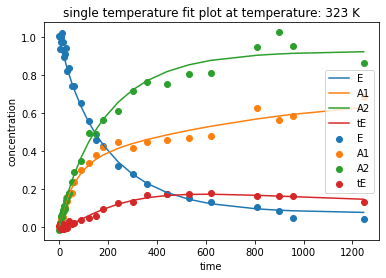

In [22]:
test_fit_6.fit_one(0,1,iterations = 1000) #you can set the amount of iterations

  0% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

score for temperature fit of 323 is: 16.933147172620743 out of 42 
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 6
    # variables        = 6
    chi-square         = 3770.08266
    reduced chi-square = 3770.08266
    Akaike info crit   = 50.6585564
    Bayesian info crit = 49.4091132
##  Warning: uncertainties could not be estimated:
[[Variables]]
    k0:  0.00584883 (init = 0.01)
    k1:  0.01061780 (init = 0.01)
    k2:  0.00408988 (init = 0.01)
    k3:  0.07789813 (init = 0.01)
    k4:  0.01595934 (init = 0.01)
    k5:  0.00529482 (init = 0.01)


100% (100 of 100) |######################| Elapsed Time: 0:00:28 ETA:  00:00:00

score for temperature fit of 363 is: 17.11548321989612 out of 42 
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 6
    # variables        = 6
    chi-square         = 3715.43505
    reduced chi-square = 3715.43505
    Akaike info crit   = 50.5709495
    Bayesian info crit = 49.3215063
##  Warning: uncertainties could not be estimated:
[[Variables]]
    k0:  0.01148200 (init = 0.01)
    k1:  0.01388697 (init = 0.01)
    k2:  0.00398537 (init = 0.01)
    k3:  0.04778165 (init = 0.01)
    k4:  0.03181753 (init = 0.01)
    k5:  0.00912107 (init = 0.01)


100% (100 of 100) |######################| Elapsed Time: 0:00:30 ETA:  00:00:00

score for temperature fit of 393 is: 17.809413066414677 out of 42 
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 6
    # variables        = 6
    chi-square         = 3511.10698
    reduced chi-square = 3511.10698
    Akaike info crit   = 50.2315631
    Bayesian info crit = 48.9821199
##  Warning: uncertainties could not be estimated:
[[Variables]]
    k0:  0.01460066 (init = 0.01)
    k1:  0.01923180 (init = 0.01)
    k2:  0.00580302 (init = 0.01)
    k3:  0.02182443 (init = 0.01)
    k4:  0.04312867 (init = 0.01)
    k5:  0.00976438 (init = 0.01)


100% (100 of 100) |######################| Elapsed Time: 0:01:10 ETA:  00:00:00

full fit score is: 50.689000822709886 out of 72
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 12
    # variables        = 12
    chi-square         = 5449.90423
    reduced chi-square = 5449.90423
    Akaike info crit   = 97.4213600
    Bayesian info crit = 103.240240
##  Warning: uncertainties could not be estimated:
[[Variables]]
    A1:  1.17680073 (init = 1.123375)
    A2:  0.24302258 (init = 0.2667994)
    A3:  0.02126573 (init = 0.02222017)
    A4:  0.01405884 (init = 8.599742e-05)
    A5:  4.63047794 (init = 4.607726)
    A6:  0.17323766 (init = 0.1979534)
    E1:  13905.0406 (init = 14046.79)
    E2:  9003.22086 (init = 8724.107)
    E3:  4836.62606 (init = 4707.428)
    E4:  1009.08267 (init = 1000)
    E5:  15121.8886 (init = 15163.89)
    E6:  10023.4886 (init = 9613.995)


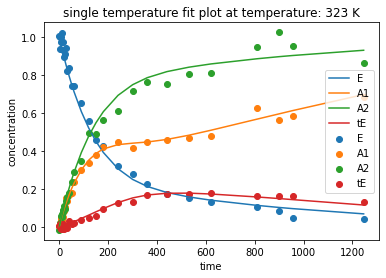

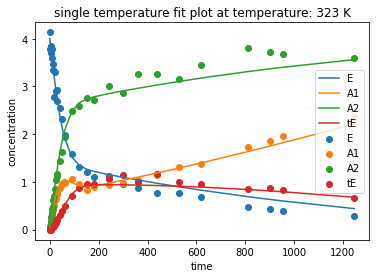

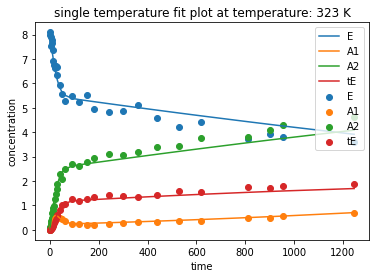

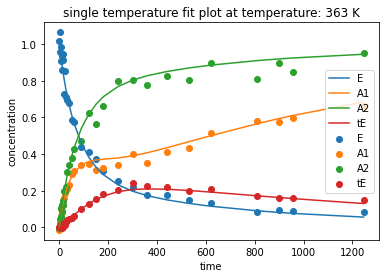

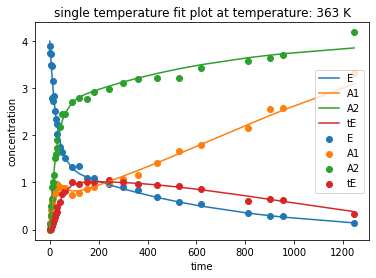

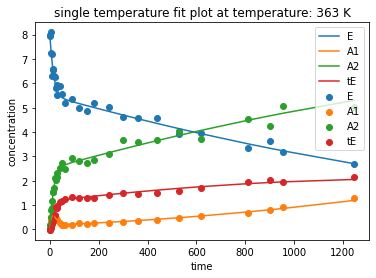

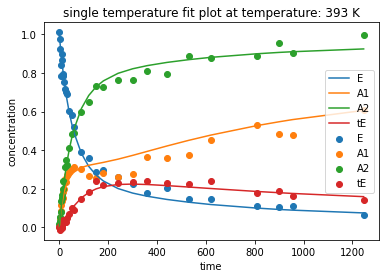

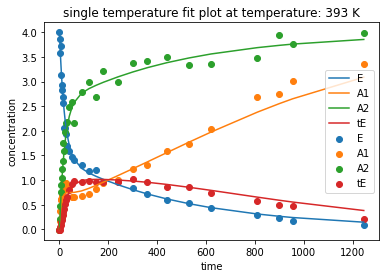

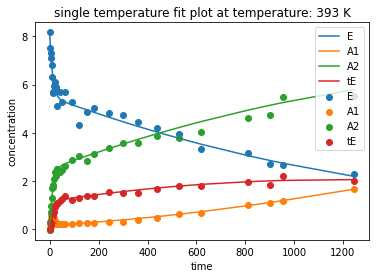

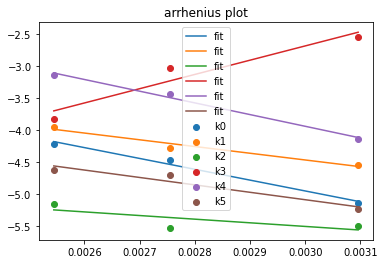

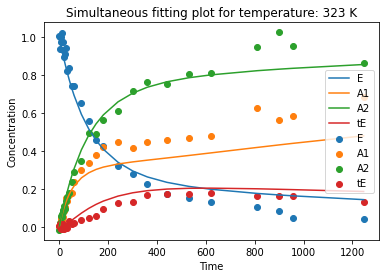

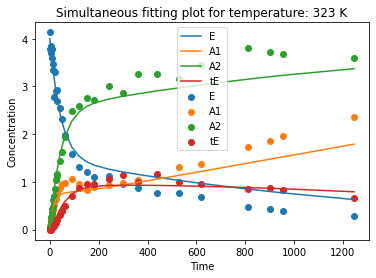

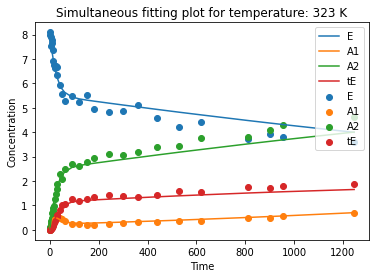

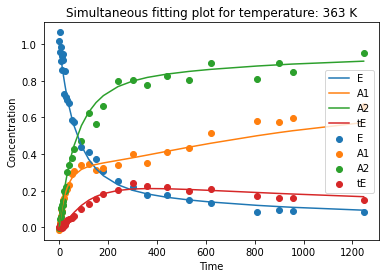

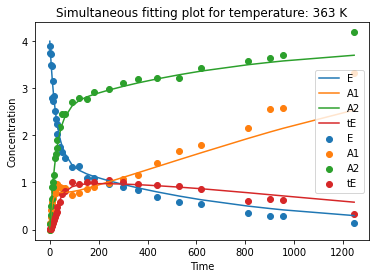

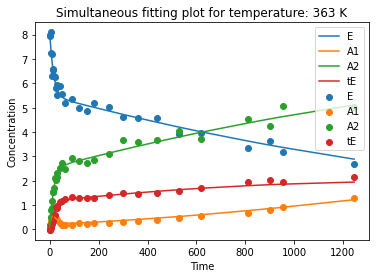

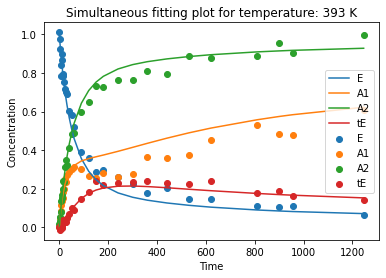

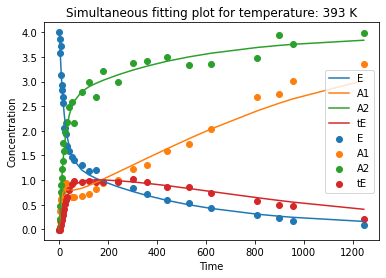

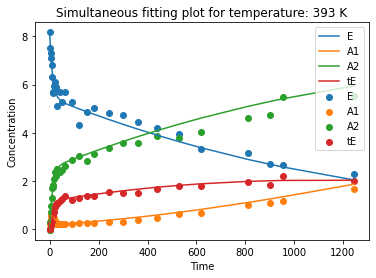

In [23]:
#this one will take long, but show the power of the algoritm, a full fitting of the right data witht the right system
test_fit_6.fit_full(0, iterations = 100, iterations_full = 100)

  0% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

score for temperature fit of 323 is: 16.721907288153677 out of 42 
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 6
    # variables        = 6
    chi-square         = 3833.89183
    reduced chi-square = 3833.89183
    Akaike info crit   = 50.7592574
    Bayesian info crit = 49.5098143
##  Warning: uncertainties could not be estimated:
    k3:  at initial value
[[Variables]]
    k0:  0.00630738 (init = 0.01)
    k1:  0.00583009 (init = 0.01)
    k2:  0.00191725 (init = 0.01)
    k3:  0.01000000 (init = 0.01)
    k4:  0.01576326 (init = 0.01)
    k5:  6.1345e-04 (init = 0.01)


  0% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

score for temperature fit of 363 is: 16.863455016763023 out of 42 
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 6
    # variables        = 6
    chi-square         = 3791.07536
    reduced chi-square = 3791.07536
    Akaike info crit   = 50.6918732
    Bayesian info crit = 49.4424300
##  Warning: uncertainties could not be estimated:
    k3:  at initial value
[[Variables]]
    k0:  0.01146907 (init = 0.01)
    k1:  0.01037532 (init = 0.01)
    k2:  0.00318575 (init = 0.01)
    k3:  0.01000000 (init = 0.01)
    k4:  0.02877188 (init = 0.01)
    k5:  0.00224895 (init = 0.01)


100% (100 of 100) |######################| Elapsed Time: 0:00:20 ETA:  00:00:00

score for temperature fit of 393 is: 17.65192201559512 out of 42 
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 6
    # variables        = 6
    chi-square         = 3556.97341
    reduced chi-square = 3556.97341
    Akaike info crit   = 50.3094350
    Bayesian info crit = 49.0599918
##  Warning: uncertainties could not be estimated:
    k3:  at initial value
[[Variables]]
    k0:  0.01542387 (init = 0.01)
    k1:  0.01708530 (init = 0.01)
    k2:  0.00570395 (init = 0.01)
    k3:  0.01000000 (init = 0.01)
    k4:  0.03903016 (init = 0.01)
    k5:  0.00500179 (init = 0.01)


100% (100 of 100) |######################| Elapsed Time: 0:00:42 ETA:  00:00:00

full fit score is: 51.259803513876605 out of 72
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 12
    # variables        = 12
    chi-square         = 5161.86900
    reduced chi-square = 5161.86900
    Akaike info crit   = 96.7697682
    Bayesian info crit = 102.588648
##  Warning: uncertainties could not be estimated:
    A4:  at initial value
    E4:  at initial value
    E4:  at boundary
[[Variables]]
    A1:  1.01479656 (init = 1.00441)
    A2:  2.16957459 (init = 2.208104)
    A3:  0.70387019 (init = 0.7241571)
    A4:  0.01000000 (init = 0.01)
    A5:  2.70993720 (init = 2.680226)
    A6:  81.2310638 (init = 80.31024)
    E1:  13567.7640 (init = 13586.28)
    E2:  16054.0255 (init = 16002.46)
    E3:  16148.3223 (init = 16047.31)
    E4:  1000.00000 (init = 1000)
    E5:  13738.0881 (init = 13764.91)
    E6:  31496.2334 (init = 31639.86)


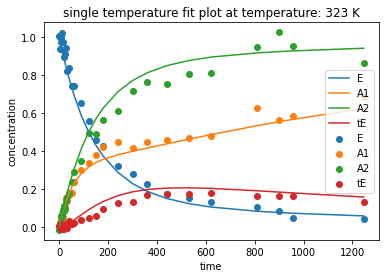

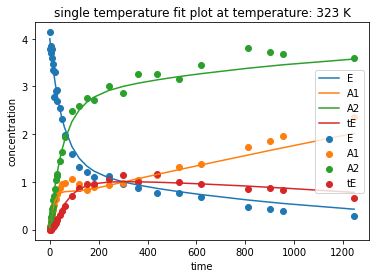

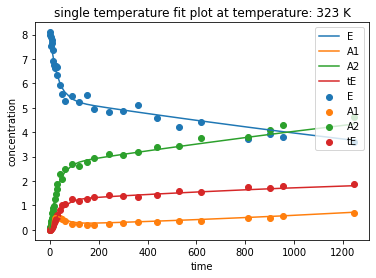

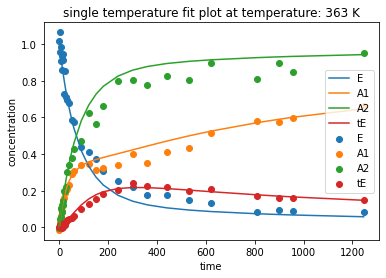

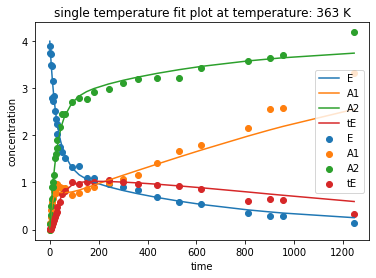

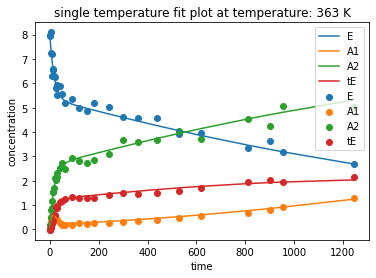

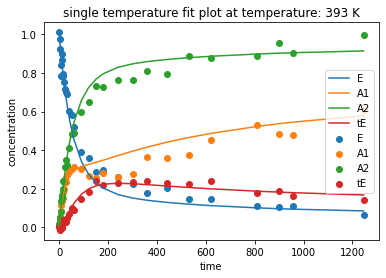

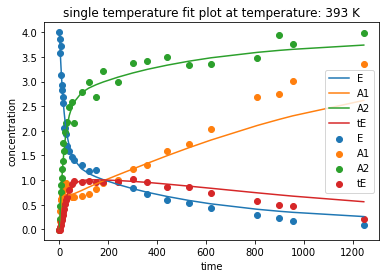

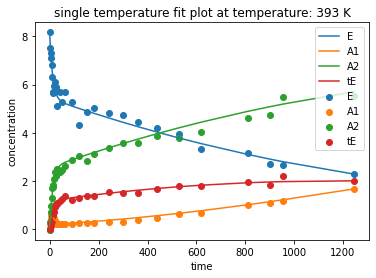

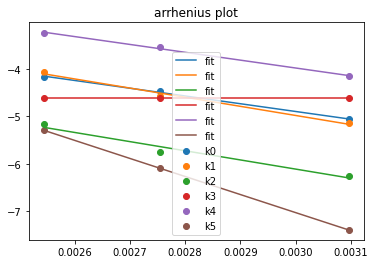

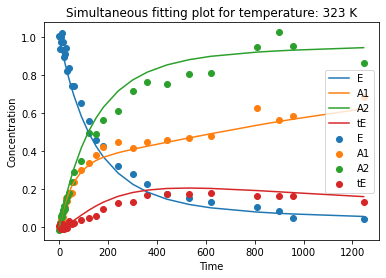

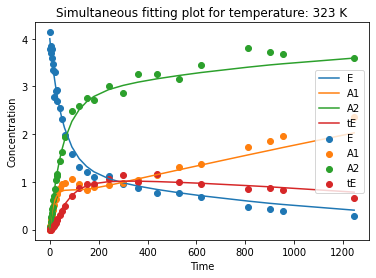

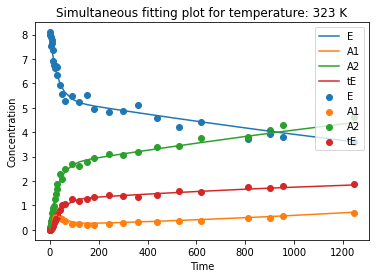

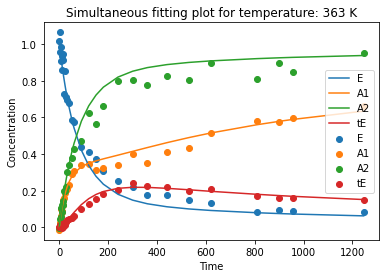

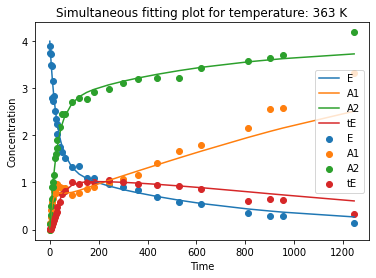

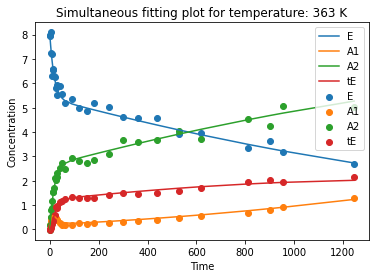

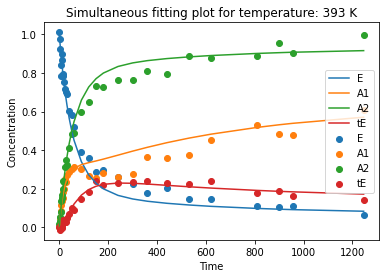

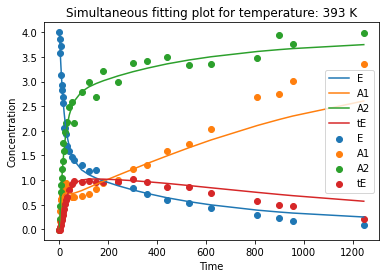

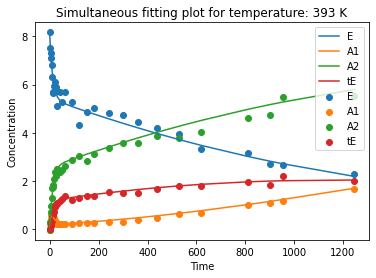

In [24]:
#we can use the screening tool to screen a differential without the trans-ester reaction pathway (reaction 4, see it is not present in the second entry in to_run)
test_fit_6.fit_full(1, iterations = 100, iterations_full = 100)

  0% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

score for temperature fit of 323 is: 13.929034701361687 out of 42 
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 6
    # variables        = 6
    chi-square         = 4727.87456
    reduced chi-square = 4727.87456
    Akaike info crit   = 52.0168293
    Bayesian info crit = 50.7673862
##  Warning: uncertainties could not be estimated:
[[Variables]]
    k0:  0.00449851 (init = 0.01)
    k1:  0.01273558 (init = 0.01)
    k2:  0.00492910 (init = 0.01)
    k3:  0.02624647 (init = 0.01)
    k4:  1.8203e-07 (init = 0.01)
    k5:  0.00238028 (init = 0.01)


100% (100 of 100) |######################| Elapsed Time: 0:00:19 ETA:  00:00:00

score for temperature fit of 363 is: 10.168287461464452 out of 42 
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 6
    # variables        = 6
    chi-square         = 6079.54754
    reduced chi-square = 6079.54754
    Akaike info crit   = 53.5255565
    Bayesian info crit = 52.2761133
##  Warning: uncertainties could not be estimated:
    k4:  at boundary
[[Variables]]
    k0:  0.00495927 (init = 0.01)
    k1:  0.01903543 (init = 0.01)
    k2:  0.00547803 (init = 0.01)
    k3:  0.02276333 (init = 0.01)
    k4:  3.9613e-09 (init = 0.01)
    k5:  0.00883329 (init = 0.01)


100% (100 of 100) |######################| Elapsed Time: 0:00:20 ETA:  00:00:00

score for temperature fit of 393 is: 10.792587225684223 out of 42 
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 6
    # variables        = 6
    chi-square         = 5843.41567
    reduced chi-square = 5843.41567
    Akaike info crit   = 53.2878679
    Bayesian info crit = 52.0384247
##  Warning: uncertainties could not be estimated:
[[Variables]]
    k0:  0.00750681 (init = 0.01)
    k1:  0.02479199 (init = 0.01)
    k2:  0.00600352 (init = 0.01)
    k3:  0.02323055 (init = 0.01)
    k4:  1.0709e-08 (init = 0.01)
    k5:  0.00580413 (init = 0.01)


 18% (18 of 100) |####                   | Elapsed Time: 0:00:13 ETA:   0:04:13

full fit score is: 9.706981785181505 out of 72
 
 fit results:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 12
    # variables        = 12
    chi-square         = 46565.0414
    reduced chi-square = 46565.0414
    Akaike info crit   = 123.164384
    Bayesian info crit = 128.983264
##  Warning: uncertainties could not be estimated:
    A1:  at initial value
    A2:  at initial value
    A3:  at initial value
    A4:  at initial value
    A5:  at initial value
    A5:  at boundary
    A6:  at initial value
    E1:  at initial value
    E2:  at initial value
    E3:  at initial value
    E4:  at initial value
    E4:  at boundary
    E5:  at initial value
    E5:  at boundary
    E6:  at initial value
[[Variables]]
    A1:  0.06234789 (init = 0.06234789)
    A2:  0.52993735 (init = 0.5299374)
    A3:  0.01464120 (init = 0.0146412)
    A4:  0.01227116 (init = 0.01227116)
    A5:  1.0000e-05 (init = 1e-05)
    A6:  0.83183562 (ini

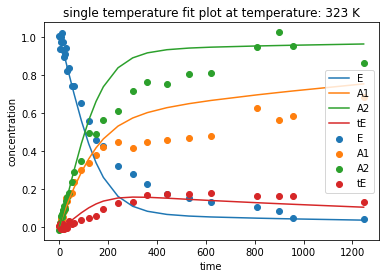

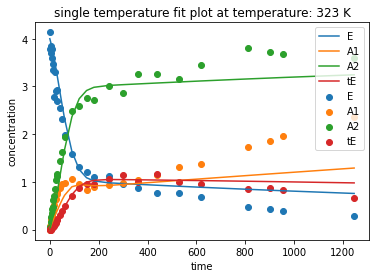

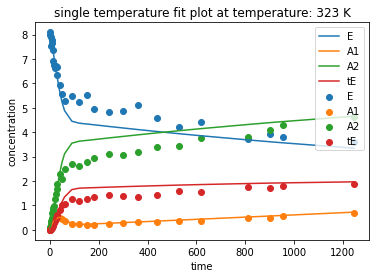

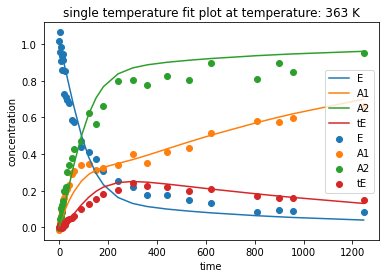

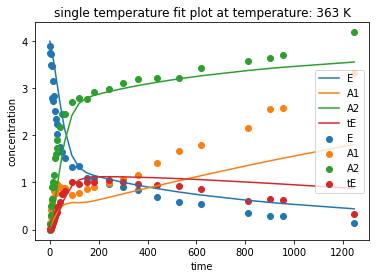

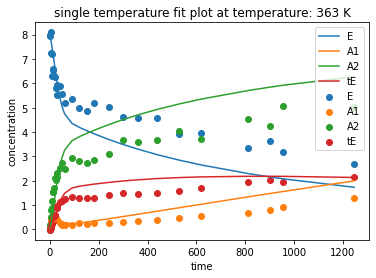

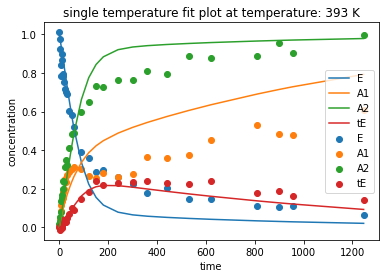

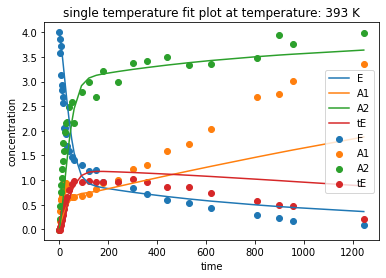

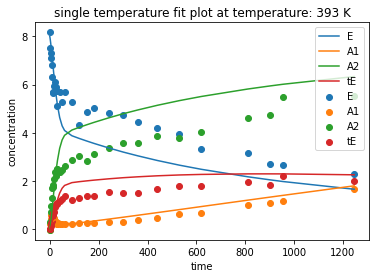

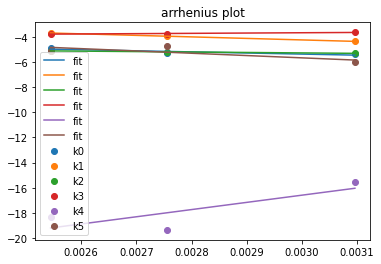

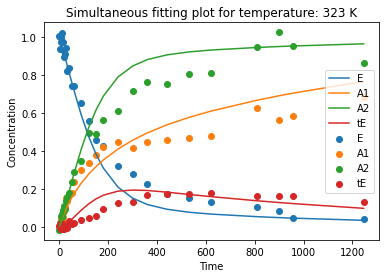

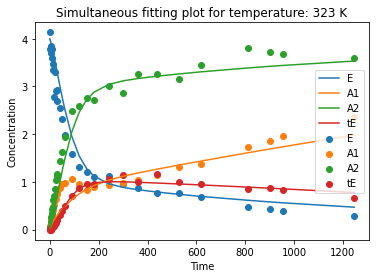

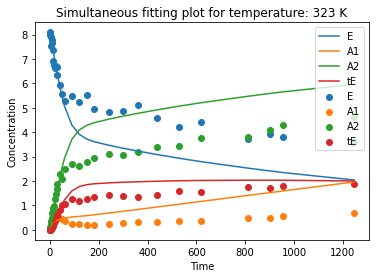

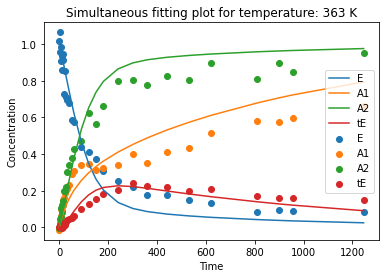

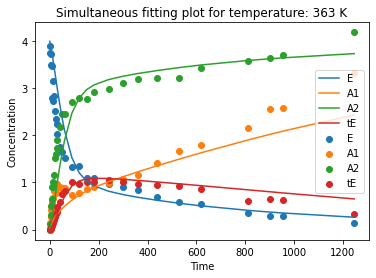

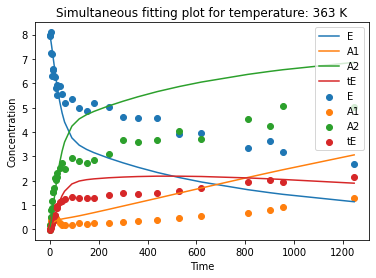

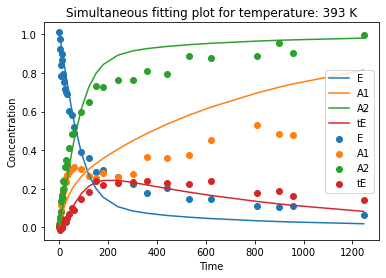

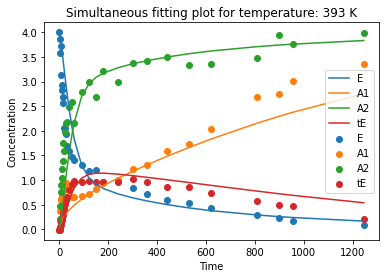

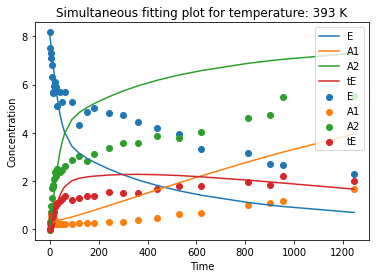

In [25]:
#Mind that the program has drastically improved perfomance with 1000 iterations
test_fit_6.fit_full(2, iterations = 100, iterations_full = 100) #and what if the first reaction was hydrogen independent, (we use option 2 for reaction 1 in the third entry of to_run)

Mind that the overhead to make the method easy to use makes it slower and less accurate.
If this algorithm has shown you which systems get agreeable scores put it into Chemfit, it requires some manual work, but it will perform leagues better and faster.